In [1]:
from collections import defaultdict
from typing import List

import os
import pandas as pd
import seaborn as sns
import re

In [2]:
data_path = "../data/part2b"

num_threads_list = [1, 2, 4, 8]
job_names = [
    "parsec-blackscholes",
    "parsec-canneal",
    "parsec-dedup",
    "parsec-ferret",
    "parsec-freqmine",
    "parsec-radix",
    "parsec-vips",
]

In [3]:
results = defaultdict(lambda: defaultdict(list))

for num_threads in num_threads_list:
    for job in job_names:

        i = 0
        path = f"{data_path}/{job}/{num_threads}"

        # Continue until the file doesn't exist
        while True:
            file_path = f"{path}/job_log{i}.txt"

            if not os.path.exists(file_path):
                break

            try:
                with open(file_path) as f:
                    lines = f.readlines()
                    results[job][num_threads].append(lines)

                # print(f"Loaded {file_path}")
            except FileNotFoundError:
                # Alternative way to break if the file doesn't exist
                break

            i += 1

In [4]:
def extract_time(lines: List[str]) -> float:

    line = [l for l in lines if "real" in l][0]

    """
    Extracts the time from a line of text.
    The line should contain the format 'real\t0m0.663s\n'.
    """
    match = re.search(r"real\s+(\d+)m([\d.]+)s", line)
    if match:
        minutes = int(match.group(1))
        seconds = float(match.group(2))
        return minutes * 60 + seconds
    else:
        raise ValueError("Line format is incorrect")

In [5]:
extracted_times = {
    job : {
        num_threads: extract_time(results[job][num_threads][0]) for num_threads in num_threads_list
    }
    for job in job_names
}

In [6]:
df = pd.DataFrame(extracted_times)
df

,parsec-blackscholes,parsec-canneal,parsec-dedup,parsec-ferret,parsec-freqmine,parsec-radix,parsec-vips
1,99.540,219.330,15.958,288.281,393.593,43.296,82.269
2,58.554,133.293,9.332,147.513,199.501,22.104,42.824
4,37.151,85.293,5.892,82.870,100.106,11.100,21.278
8,28.965,66.566,5.520,70.885,81.631,7.099,18.388


<Axes: >

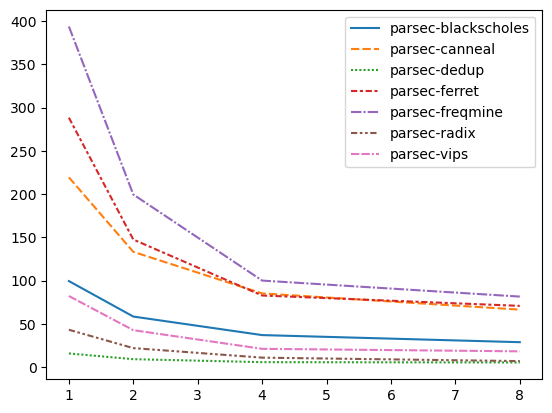

In [7]:
sns.lineplot(df)

In [16]:
df = pd.DataFrame(extracted_times)

df.iloc[1] = df.iloc[0] / df.iloc[1]
df.iloc[2] = df.iloc[0] / df.iloc[2]
df.iloc[3] = df.iloc[0] / df.iloc[3]

In [17]:
df

,parsec-blackscholes,parsec-canneal,parsec-dedup,parsec-ferret,parsec-freqmine,parsec-radix,parsec-vips
1,99.540000,219.330000,15.958000,288.281000,393.593000,43.296000,82.269000
2,1.699969,1.645473,1.710030,1.954275,1.972887,1.958740,1.921096
4,2.679336,2.571489,2.708418,3.478714,3.931762,3.900541,3.866388
8,3.436561,3.294925,2.890942,4.066883,4.821612,6.098887,4.474059
